# Properties of the regression's coefficients

Regression cames from the latin word regressus, which means "to return". In statistics, we are interest in study a variable $y$, one should test if $y$ returns to a model randonly and in an unbiased way.

The simplest mathematical model, the linear relation between the variable $y$ and $X$ via a scalar response parameter $\beta$, can be inspect using the linear regression method.

In other words, it searchs the vector $y$ as a linear combination of $X$ vector columns.

The parameters $\beta$ can be estimated (find $\hat{\mathbf{\beta}}$) using least-squares estimation as follows
\begin{equation}
 \hat{\mathbf{\beta}} = \text{argmin}_{\mathbf{\beta}} \|\mathbf{y}- \mathbf{X}\mathbf{\beta}  \|
\end{equation}
which leads to the so called normal equations. Solving it for $\mathbf{\beta}$ results 
\begin{equation}
 \hat{\beta} = ( \mathbf{X}^{T} \mathbf{X})^{-1} \mathbf{X}^{T} \mathbf{y}.
\end{equation}

This elegantly simple expression is a well known result of the best (minimum variance) linear unbised ($\mathbf{E(\beta) = \hat{\beta}}$) estimator. 

But despite its algebraic elegance, much of the intuition regarding the interplay between $\mathbf{X}$ and $\mathbf{y}$ is concealed within it's hermetic form. 

To explore this intuition, we are going to solve $\mathbf{\hat{\beta}}$ when $\mathbf{X}$ has one, two and three dimensions.

We are going to compare the result with the parameter output of OLS statsmodels using python.



In this case, the $\mathbf{y}$ will be the return of the net asset value (NAV) of a portfolio composed by different types of assets, so the $\mathbf{X}$ variable are the returns of those assets, and finally the $\mathbf{\beta}$ will be an estimation of the weight invested in each asset class.


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import pandas as pd
import statsmodels.api as sm
from IPython.display import Markdown as md

# Pretty display for notebooks
%matplotlib inline


The value invested in the portfolio at $t$ consist of the amount $P_{t}$ of money distributed among assets, one buy or sell $n_{i}$ units contracts of asset $i$ with unit value $a_{i,t}$, therefore

\begin{equation}
P_{t} = \sum_{i=1}^{N} n_{i} a_{i,t}
\end{equation}

and the return on a $\tau$ scale is the following

\begin{equation}
\label{eq1}
\frac{P_{t}}{P_{t-\tau}} = \frac{\sum_{i=1}^{N} n_{i} a_{i,t}}{\sum_{i=1}^{N} n_{i} a_{i,t-\tau}}
\end{equation}

note that one can write the present value of a asset $i$ as its the return 
\begin{equation}
a_{i,t} =  a_{i,t-\tau} (1 + r_{i,t})
\end{equation}

substituting in \eqref{eq1} and  dividing by $P_{t-\tau}$ on both numerator and denominator in the left-hand side lead us to
\begin{equation}
\frac{P_{t}}{P_{t-\tau}} = \frac{\sum_{i=1}^{N} \frac{ n_{i} a_{i,t-\tau} }{ P_{t-\tau}} (1 + r_{i,t})}{\sum_{i=1}^{N} \frac {n_{i} a_{i,t-\tau}}{P_{t-\tau}} }
\end{equation}

note that $w_{i,t} =  n_{i} a_{i,t} / P_{t}$ are the weight invested in each asset class and $ R_{t} + 1 =  P_{t}/ P_{t-\tau}$


\begin{equation}
R_{t} + 1 = \frac{\sum_{i=1}^{N} w_{i,t-\tau} (1 + r_{i,t}) }{\sum_{i=1}^{N} w_{i,t-\tau} }
\end{equation}
and since $\sum_{i=1}^{N} w_{i,t-\tau} = 1$  


\begin{equation}
R_{t} = \sum_{i=1}^{N} w_{i,t-\tau} r_{i,t} 
\end{equation}

The return of the net asset value is a linear combination of the return of each asset.

Therefore, the goal is to estimate the weights $w_{i}$ invested in each asset knowing just the timeseries $R_{t}$ (this will be our $y$) and the $X$ will be a set of timeseries of asset class.

\begin{equation}
\hat{R}_{t} = \sum_{i \in \mathcal{S}^{*}} \hat{\beta}_{i,t-\tau} r_{i,t} 
\end{equation}
where $\mathcal{S}^{*}$ is the set of asset we choose to regress the net asset return.
This leads us to define the set $\mathcal{S}$ having all asset invested in our portfolio.
If we get luck the matching asset live in $\mathcal{S} \cap \mathcal{S}^{*}$.

\begin{equation}
R_{t}  - \hat{R}_{t} = \sum_{i \in \mathcal{S} \cap \mathcal{S}^{*} } (w_{i,t-\tau} - \hat{\beta}_{i,t-\tau} ) r_{i,t}  + 
\sum_{i \in \mathcal{S} / \mathcal{S}^{*} } w_{i,t-\tau} r_{i,t}  -
\sum_{i \in \mathcal{S}^{*} / \mathcal{S} } \hat{\beta}_{i,t-\tau} r_{i,t} 
\end{equation}

In this execise, let us consider a portfolio investing and keeping the weights as follows: 20\% of Brazilian Real currency, 5\% of Bitcoin, 60\% of US 10 year bonds and 15\% of S&P ETFs.

In [2]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
# data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")
df = pdr.get_data_yahoo("GOVT SPY BTC-USD BRL=X", start="2017-01-01", end="2020-01-01")

[*********************100%%**********************]  4 of 4 completed


In [3]:
df.tail()

Adj Close                                         Close  \
               BRL=X      BTC-USD       GOVT         SPY     BRL=X   
Date                                                                 
2019-12-27  4.054700  7290.088379  24.116089  303.171021  4.054700   
2019-12-28       NaN  7317.990234        NaN         NaN       NaN   
2019-12-29       NaN  7422.652832        NaN         NaN       NaN   
2019-12-30  4.022300  7292.995117  24.097540  301.499603  4.022300   
2019-12-31  4.015711  7193.599121  24.069695  302.231995  4.015711   

                                                    High               ...  \
                BTC-USD       GOVT         SPY     BRL=X      BTC-USD  ...   
Date                                                                   ...   
2019-12-27  7290.088379  25.990000  322.859985  4.075362  7363.529297  ...   
2019-12-28  7317.990234        NaN         NaN       NaN  7399.041016  ...   
2019-12-29  7422.652832        NaN         NaN       NaN  7513.948242  ...   
2019-12-30  7292.995117  25.969999  321.079987  4.045137  7454.824219  ...   
2019-12-31  7193.599121  25.940001  321.859985  4.025500  7335.290039  ...   

                  Low                  Open                          \
                 GOVT         SPY     BRL=X      BTC-USD       GOVT   
Date                                                                  
2019-12-27  25.969999  322.279999  4.054700  7238.141113  25.980000   
2019-12-28        NaN         NaN       NaN  7289.031250        NaN   
2019-12-29        NaN         NaN       NaN  7317.647461        NaN   
2019-12-30  25.900000  320.549988  4.022300  7420.272949  25.920000   
2019-12-31  25.900000  320.149994  4.015712  7294.438965  25.940001   

                       Volume                                      
                   SPY  BRL=X      BTC-USD       GOVT         SPY  
Date                                                               
2019-12-27  323.739990    0.0  22777360996  3218400.0  42528800.0  
2019-12-28         NaN    NaN  21365673026        NaN         NaN  
2019-12-29         NaN    NaN  22445257702        NaN         NaN  
2019-12-30  322.950012    0.0  22874131672  2533200.0  49729100.0  
2019-12-31  320.529999    0.0  21167946112  3260200.0  57077300.0  

[5 rows x 24 columns]

In [4]:
dfAdCl = df.xs('Adj Close',level=0,axis=1)

In [5]:
dfRetX = dfAdCl.pct_change(1)
dfRetX = dfRetX.fillna(method='ffill')
dfRetX = dfRetX.dropna(how='any',axis=0)
dfRetX

,BRL=X,BTC-USD,GOVT,SPY
Date,,,,
2017-01-04,-0.006242,0.106233,0.000802,0.005949
2017-01-05,-0.015137,-0.122410,0.005211,-0.000794
2017-01-06,-0.005102,-0.109711,-0.003190,0.003578
2017-01-07,0.000000,0.007076,0.000000,0.000000
2017-01-08,0.000000,0.002877,0.000000,0.000000
...,...,...,...,...
2019-12-27,-0.006931,0.007062,0.001155,-0.000248
2019-12-28,0.000000,0.003827,0.000000,0.000000
2019-12-29,0.000000,0.014302,0.000000,0.000000


In [6]:
dfWtg = pd.DataFrame(dfRetX.shape[0]*[[0.20,0.05,0.60,0.15]],columns = dfRetX.columns, index = dfRetX.index)
dfWtg

,BRL=X,BTC-USD,GOVT,SPY
Date,,,,
2017-01-04,0.2,0.05,0.6,0.15
2017-01-05,0.2,0.05,0.6,0.15
2017-01-06,0.2,0.05,0.6,0.15
2017-01-07,0.2,0.05,0.6,0.15
2017-01-08,0.2,0.05,0.6,0.15
...,...,...,...,...
2019-12-27,0.2,0.05,0.6,0.15
2019-12-28,0.2,0.05,0.6,0.15
2019-12-29,0.2,0.05,0.6,0.15


In [7]:
dfRetY = (dfRetX*dfWtg).sum(axis=1)
dfCumRetY = (1.0+dfRetY).cumprod()
dfCumRetY = pd.DataFrame(dfCumRetY,columns = ['PORTFOLIO'])
dfCumRetY

,PORTFOLIO
Date,
2017-01-04,1.005437
2017-01-05,0.999263
2017-01-06,0.991385
2017-01-07,0.991736
2017-01-08,0.991879
...,...
2019-12-27,1.375209
2019-12-28,1.375472
2019-12-29,1.376455


In [8]:
dfCumRetX = (1.0 + dfRetX).cumprod()
dfCumRetX

,BRL=X,BTC-USD,GOVT,SPY
Date,,,,
2017-01-04,0.993758,1.106233,1.000802,1.005949
2017-01-05,0.978715,0.970819,1.006017,1.005150
2017-01-06,0.973721,0.864310,1.002808,1.008746
2017-01-07,0.973721,0.870426,1.002808,1.008746
2017-01-08,0.973721,0.872930,1.002808,1.008746
...,...,...,...,...
2019-12-27,1.234683,6.983914,1.101999,1.517224
2019-12-28,1.234683,7.010644,1.101999,1.517224
2019-12-29,1.234683,7.110911,1.101999,1.517224


<AxesSubplot:xlabel='Date'>

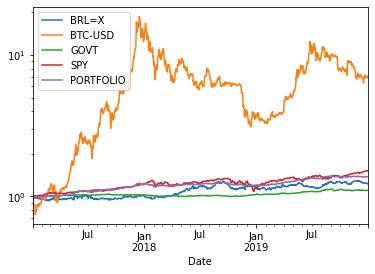

In [9]:
pd.concat([dfCumRetX,dfCumRetY],axis=1).plot(logy=True)

,BRL=X,BTC-USD,GOVT,SPY
BRL=X,1.000000,-0.003624,0.052938,0.010239
BTC-USD,-0.003624,1.000000,0.016306,0.039186
GOVT,0.052938,0.016306,1.000000,-0.365724
SPY,0.010239,0.039186,-0.365724,1.000000


In [11]:
dfRetY = pd.DataFrame(dfRetY,columns = ['PORTFOLIO'])
dfRetY

,PORTFOLIO
Date,
2017-01-04,0.005437
2017-01-05,-0.006141
2017-01-06,-0.007883
2017-01-07,0.000354
2017-01-08,0.000144
...,...
2019-12-27,-0.000377
2019-12-28,0.000191
2019-12-29,0.000715


In [31]:
dfCorr = pd.concat([dfRetY,dfRetX],axis=1).corr()

dfCorr.corr()

,PORTFOLIO,BRL=X,BTC-USD,GOVT,SPY
PORTFOLIO,1.000000,0.438392,0.758976,-0.069444,-0.176613
BRL=X,0.438392,1.000000,-0.201715,-0.066664,-0.182337
BTC-USD,0.758976,-0.201715,1.000000,-0.137970,-0.089042
GOVT,-0.069444,-0.066664,-0.137970,1.000000,-0.828386
SPY,-0.176613,-0.182337,-0.089042,-0.828386,1.000000


# Coefficient's Regression with One Independent Variables


In [12]:

Y = dfRetY.loc[:,['PORTFOLIO']]
X = dfRetX.loc[:,['GOVT']]
X = sm.add_constant(X) # manually add a constant here
# X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PORTFOLIO   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     87.23
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           5.28e-20
Time:                        09:36:21   Log-Likelihood:                 4809.1
No. Observations:                1092   AIC:                            -9614.
Df Residuals:                    1090   BIC:                            -9604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003   8.97e-05      2.801      0.005    7.53e-05       0.000
GOVT           0.4655      0.050      9.339      0.000       0.368       0.563
==============================================================================
Omnibus:                      103.339   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              527.048
Skew:                           0.259   Prob(JB):                    3.57e-115
Kurtosis:                       6.364   Cond. No.                         556.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


\begin{equation}
\beta = \frac{\sigma_{y}}{\sigma_{x}} \rho_{x,y}
\end{equation}


In [13]:
sY = Y.std()['PORTFOLIO']
s1 = X.std()['GOVT']

dfCorr = pd.concat([X,Y],axis=1).corr()

rho1y = dfCorr.loc['GOVT','PORTFOLIO']

beta = (sY/s1) * rho1y


In [14]:
md( '$ \\beta$' + ' = {:.4f} '.format(beta) )

$ \beta$ = 0.4655 

the formula matchs the statsmodel output, but it miss the  60\% real weight of US gov.

In [30]:
dfTemp = pd.DataFrame(results.resid,columns=['RESD-GOVT'])
dfCorr = pd.concat([dfTemp,dfRetX],axis=1).corr()
for col in dfCorr.columns:
    dfCorr.loc[:,col] = dfCorr.loc[:,col].apply(lambda x : round(x,3))
dfCorr
                                                

,RESD-GOVT,BRL=X,BTC-USD,GOVT,SPY
RESD-GOVT,1.000,0.585,0.744,-0.000,0.345
BRL=X,0.585,1.000,-0.004,0.053,0.010
BTC-USD,0.744,-0.004,1.000,0.016,0.039
GOVT,-0.000,0.053,0.016,1.000,-0.366
SPY,0.345,0.010,0.039,-0.366,1.000


As expected, the correlation between GOVT and the residue is very close to zero, while the correlation with other variable remains significant. Note the change in the correlation values with theother variables. For example, the SPY return has a correlation with the portfolio return of approx -0.177 while the residue has 0.345.

# Coefficient's Regression with Two Independent Variables


In [32]:

Y = dfRetY.loc[:,['PORTFOLIO']]
X = dfRetX.loc[:,['GOVT','SPY']]
X = sm.add_constant(X) # manually add a constant here
# X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PORTFOLIO   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     137.1
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           8.05e-54
Time:                        10:33:24   Log-Likelihood:                 4889.6
No. Observations:                1092   AIC:                            -9773.
Df Residuals:                    1089   BIC:                            -9758.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   8.37e-05      1.907      0.057   -4.61e-06       0.000
GOVT           0.7049      0.050     14.166      0.000       0.607       0.803
SPY            0.1756      0.013     13.158      0.000       0.149       0.202
==============================================================================
Omnibus:                      118.369   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.066
Skew:                           0.349   Prob(JB):                    1.23e-133
Kurtosis:                       6.601   Cond. No.                         600.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From $R^2 = \sum_{i=1}^{n} (y_{i} - \hat{y}_{i}) ^2 = \sum_{i=1}^{n} (y_{i} - \hat{\beta}_{i} x_{i}) ^2 $ 

The $\hat{\beta}$ which minimize the expression above are found by differentiating $R^2$ regarding $\hat{\beta}$. This leads us to a set of equations whose solutions are the following: 

\begin{equation}
\beta_{1} = \frac{\sigma_{y}}{\sigma_{x_{1}}} \frac{ \rho_{x_{1}y} - \rho_{x_{2}y}  \rho_{x_{1}x_{2}}}{1 - \rho^{2}_{x_{1}x_{2}}}
\end{equation}


\begin{equation}
\beta_{2} = \frac{\sigma_{y}}{\sigma_{x_{2}}} \frac{ \rho_{x_{2}y} - \rho_{x_{1}y}  \rho_{x_{1}x_{2}}}{1 - \rho^{2}_{x_{1}x_{2}}}
\end{equation}

The denominator shows the importance of using proper exogenous variable in the estimation of beta. Because if $x_{1}$ and $x_{2}$ are collinear it's correlation $\rho^{2}_{x_{1}x_{2}}  \approx 1$ causing the parameter to explode.

In [33]:
sY = Y.std()['PORTFOLIO']
s1 = X.std()['GOVT']
s2 = X.std()['SPY']

dfCorr = pd.concat([X,Y],axis=1).corr()

rho12 = dfCorr.loc['GOVT','SPY']
rho1y = dfCorr.loc['GOVT','PORTFOLIO']
rho2y = dfCorr.loc['PORTFOLIO','SPY']



In [34]:
beta1 = (sY/s1)*((rho1y - rho2y*rho12)/(1 - rho12**2)) 

In [35]:
md( '$ \\beta_{1}$' + ' = {:.4f} '.format(beta1) )

$ \beta_{1}$ = 0.7049 

In [36]:
beta2 = (sY/s2)*((rho2y - rho1y*rho12)/(1 - rho12**2)) 

In [37]:
md( '$ \\beta_{2}$' + ' = {:.4f} '.format(beta2) )

$ \beta_{2}$ = 0.1756 

Ok the formula matchs the statsmodel output, but it miss the  60\% real weight of US gov. bond and the 15\% of the S&P ETF.

In [38]:
dfTemp = pd.DataFrame(results.resid,columns=['RESD-GOVT'])
dfCorr = pd.concat([dfTemp,dfRetX],axis=1).corr()
for col in dfCorr.columns:
    dfCorr.loc[:,col] = dfCorr.loc[:,col].apply(lambda x : round(x,3))
dfCorr
                                                

,RESD-GOVT,BRL=X,BTC-USD,GOVT,SPY
RESD-GOVT,1.000,0.617,0.782,-0.000,-0.000
BRL=X,0.617,1.000,-0.004,0.053,0.010
BTC-USD,0.782,-0.004,1.000,0.016,0.039
GOVT,-0.000,0.053,0.016,1.000,-0.366
SPY,-0.000,0.010,0.039,-0.366,1.000


Once more, the correlation between the residue and the exogenous variable, this time GOVT and SPY, is very close to zero, while the correlation with other variable remains significant. Note the change in the correlation values with the other variables. For example, the BTC-USD return has a correlation with the portfolio return of approx 0.759 while the residue has 0.782.

# Coefficient's Regression with Three Independent Variables


In [39]:

Y = dfRetY.loc[:,['PORTFOLIO']]
X = dfRetX.loc[:,['GOVT','SPY','BRL=X']]
X = sm.add_constant(X) # manually add a constant here
# X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PORTFOLIO   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     371.5
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          4.39e-166
Time:                        11:08:11   Log-Likelihood:                 5152.1
No. Observations:                1092   AIC:                        -1.030e+04
Df Residuals:                    1088   BIC:                        -1.028e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001   6.58e-05      1.894      0.058   -4.46e-06       0.000
GOVT           0.6430      0.039     16.395      0.000       0.566       0.720
SPY            0.1669      0.011     15.892      0.000       0.146       0.187
BRL=X          0.1985      0.008     25.916      0.000       0.183       0.213
==============================================================================
Omnibus:                      121.345   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              680.096
Skew:                           0.332   Prob(JB):                    2.08e-148
Kurtosis:                       6.809   Cond. No.                         602.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
R2 = 1-(Y.iloc[:,0] - results.predict(X)).apply(lambda x : x**2).sum()/ (Y.iloc[:,0] - Y.iloc[:,0].mean()).apply(lambda x : x**2).sum()


In [41]:
md('$R^2 = {:.3f}$'.format(R2))

$R^2 = 0.506$

I will spare the reader the details, the results are the following:

\begin{equation}
\beta_{1} = \frac{\sigma_{y}}{\sigma_{x_{1}}} 
\frac{
    \rho_{x_{1}y} (1-\rho^{2}_{x_{2}x_{3}}) + 
    \rho_{x_{2}y} ( \rho_{x_{1}x_{3}}  \rho_{x_{2}x_{3}} -  \rho_{x_{1}x_{2}}) +
    \rho_{x_{3}y} ( \rho_{x_{1}x_{2}}  \rho_{x_{2}x_{3}} -  \rho_{x_{1}x_{3}})
}{
    1 + 2  \rho_{x_{1}x_{2}} \rho_{x_{1}x_{3}} \rho_{x_{2}x_{3}} -  \rho^{2}_{x_{1}x_{3}} -\rho^{2}_{x_{2}x_{3}} - \rho^{2}_{x_{1}x_{2}}
}
\end{equation}

\begin{equation}
\beta_{2} = \frac{\sigma_{y}}{\sigma_{x_{2}}} 
\frac{
    \rho_{x_{2}y} (1-\rho^{2}_{x_{1}x_{3}}) + 
    \rho_{x_{1}y} ( \rho_{x_{2}x_{3}}  \rho_{x_{1}x_{3}} -  \rho_{x_{2}x_{1}}) +
    \rho_{x_{3}y} ( \rho_{x_{2}x_{1}}  \rho_{x_{1}x_{3}} -  \rho_{x_{2}x_{3}})
}{
    1 + 2  \rho_{x_{1}x_{2}} \rho_{x_{1}x_{3}} \rho_{x_{2}x_{3}} -  \rho^{2}_{x_{1}x_{3}} -\rho^{2}_{x_{2}x_{3}} - \rho^{2}_{x_{1}x_{2}}
}
\end{equation}


\begin{equation}
\beta_{3} = \frac{\sigma_{y}}{\sigma_{x_{3}}} 
\frac{
    \rho_{x_{3}y} (1-\rho^{2}_{x_{2}x_{1}}) + 
    \rho_{x_{2}y} ( \rho_{x_{3}x_{1}}  \rho_{x_{2}x_{1}} -  \rho_{x_{3}x_{2}}) +
    \rho_{x_{1}y} ( \rho_{x_{3}x_{2}}  \rho_{x_{2}x_{1}} -  \rho_{x_{3}x_{1}})
}{
    1 + 2  \rho_{x_{1}x_{2}} \rho_{x_{1}x_{3}} \rho_{x_{2}x_{3}} -  \rho^{2}_{x_{1}x_{3}} -\rho^{2}_{x_{2}x_{3}} - \rho^{2}_{x_{1}x_{2}}
}
\end{equation}


Once more the collinearity problem can arise from bad variable selection. Depite three variables cases, even if $x_{1}$ and $x_{2}$ are perfectly collinear, that is  $\rho^{2}_{x_{1}x_{2}} = 1$, implies $\rho_{x_{1}x_{3}} = \rho_{x_{2}x_{3}}$ which leads the denominator to zero and the betas explode.

In [42]:
sY = Y.std()['PORTFOLIO']
s1 = X.std()['GOVT']
s2 = X.std()['SPY']
s3 = X.std()['BRL=X']

dfCorr = pd.concat([X,Y],axis=1).corr()

rho12 = dfCorr.loc['GOVT','SPY']

rho13 = dfCorr.loc['GOVT','BRL=X']

rho23 = dfCorr.loc['BRL=X','SPY']

rho1y = dfCorr.loc['GOVT','PORTFOLIO']
rho2y = dfCorr.loc['PORTFOLIO','SPY']
rho3y = dfCorr.loc['PORTFOLIO','BRL=X']


In [43]:
beta1 = (sY/s1)*(
rho1y*(1-rho23**2) + rho2y*(rho13*rho23 - rho12)+rho3y*(rho12*rho23-rho13)
)/(
    1+2*rho12*rho13*rho23 - rho13**2 - rho23**2 - rho12**2
)

In [44]:
md( '$ \\beta_{1}$' + ' = {:.4f} '.format(beta1) )

$ \beta_{1}$ = 0.6430 

In [45]:
beta2 = (sY/s2)*(
rho2y*(1-rho13**2) + rho1y*(rho13*rho23 - rho12)+rho3y*(rho12*rho13-rho23)
)/(
    1+2*rho12*rho13*rho23 - rho13**2 - rho23**2 - rho12**2
)

In [46]:
md( '$ \\beta_{2}$' + ' = {:.4f} '.format(beta2) )

$ \beta_{2}$ = 0.1669 

In [47]:
beta3 = (sY/s3)*(
rho3y*(1-rho12**2) + rho2y*(rho13*rho12 - rho23)+rho1y*(rho12*rho23-rho13)
)/(
    1+2*rho12*rho13*rho23 - rho13**2 - rho23**2 - rho12**2
)

In [48]:
md( '$ \\beta_{3}$' + ' = {:.4f} '.format(beta3) )

$ \beta_{3}$ = 0.1985 

Once more, the formula matches the statsmodel output, but this time it gets closer to the real weight:  60\% of US gov. bond , the 15\% of the S&P ETF and the 20% of USDBRL.



In [49]:
dfTemp = pd.DataFrame(results.resid,columns=['RESD-GOVT'])
dfCorr = pd.concat([dfTemp,dfRetX],axis=1).corr()
for col in dfCorr.columns:
    dfCorr.loc[:,col] = dfCorr.loc[:,col].apply(lambda x : round(x,3))
dfCorr
                                                

,RESD-GOVT,BRL=X,BTC-USD,GOVT,SPY
RESD-GOVT,1.000,0.000,0.999,0.000,-0.000
BRL=X,0.000,1.000,-0.004,0.053,0.010
BTC-USD,0.999,-0.004,1.000,0.016,0.039
GOVT,0.000,0.053,0.016,1.000,-0.366
SPY,-0.000,0.010,0.039,-0.366,1.000


Now the correlation between the residue and the remaining variable,  BTC-USD, is very close to one.